# Comparing t-distribution with normal distribution

This short set of notes will show some differences in the t-distribution with varying degrees of freedom with a normal distribution. This 

In [9]:
df <- c(2, 10, 15, 20, 30, 50, 100, 1000)

t_dist <- do.call('rbind', lapply(seq_along(df), function(xx) data.frame(value = seq(-5, 5, .01), density = dt(seq(-5, 5, .01), df = df[xx]), df = df[xx], normal = FALSE)))

z_dist <- data.frame(value = seq(-5, 5, .01), density = dnorm(seq(-5, 5, .01)), normal = TRUE, df = 0)

dist <- rbind(t_dist, z_dist)

head(dist)

,value,density,df,normal
,<dbl>,<dbl>,<dbl>,<lgl>
1,-5.00,0.007127781,2,FALSE
2,-4.99,0.007167524,2,FALSE
3,-4.98,0.007207557,2,FALSE
4,-4.97,0.007247883,2,FALSE
5,-4.96,0.007288503,2,FALSE
6,-4.95,0.007329422,2,FALSE


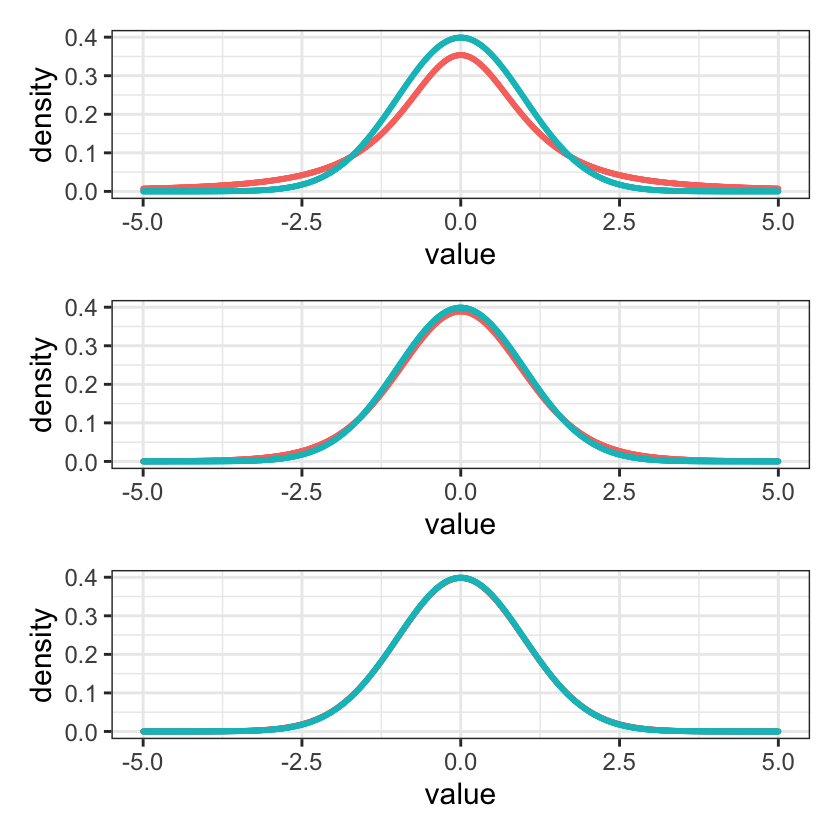

In [24]:
library(tidyverse)
library(ggformula)
library(patchwork)

theme_set(theme_bw(base_size = 18))

dist %>%
filter(df %in% c(0, 2)) %>%
gf_point(density ~ value, color = ~ normal, size = 1) %>%
  gf_refine(theme(legend.position = 'none')) /
dist %>%
filter(df %in% c(0, 10)) %>%
gf_point(density ~ value, color = ~ normal, size = 1) %>%
  gf_refine(theme(legend.position = 'none')) / 
  dist %>%
filter(df %in% c(0, 100)) %>%
gf_point(density ~ value, color = ~ normal, size = 1) %>%
  gf_refine(theme(legend.position = 'none'))